# Comparing with tscounts (R)

The present notebook presentsthe results of the self created module to implement the Poisson Autoregression for comparison against the available implementation existing in R in the package tscounts

In [1]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

base_path = os.path.dirname(os.getcwd())
sys.path.append(base_path)

from PoissonAutoregression.PoissonAutoregression import PoissonAutoregression, AutoINGARCH
from statsmodels.graphics.tsaplots import plot_acf

## Case 1: Campylobacter infections in Canada

In [2]:
campy = pd.read_csv(os.path.join(base_path, 'Data', 'campylobacter_data.csv'))
campy = campy['x'].to_numpy()

In [3]:
campy_fit_lineal = PoissonAutoregression(1,1,link="lineal")
campy_fit_lineal.fit(campy)


In [4]:
campy_fit_lineal.coefs

array([2.29291288, 0.28814824, 0.51914598])

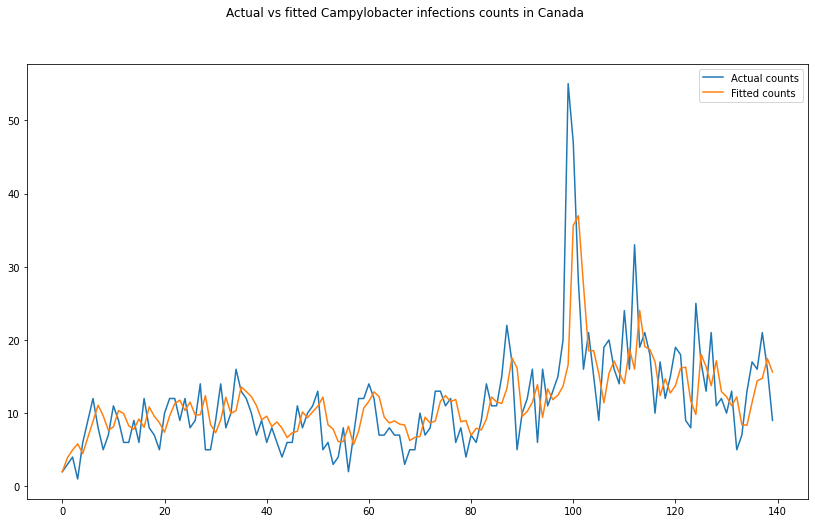

In [5]:
fig = plt.figure(figsize=(14,8))
fig.suptitle('Actual vs fitted Campylobacter infections counts in Canada')
actual, = plt.plot(range(campy.shape[0]),campy,label='Actual counts')
fitted, = plt.plot(range(campy.shape[0]),campy_fit_lineal.fitted,label='Fitted counts')
plt.legend(handles=[actual,fitted])
plt.show()

In [6]:
mean_squared_error(campy, campy_fit_lineal.fitted)

30.6694492726353

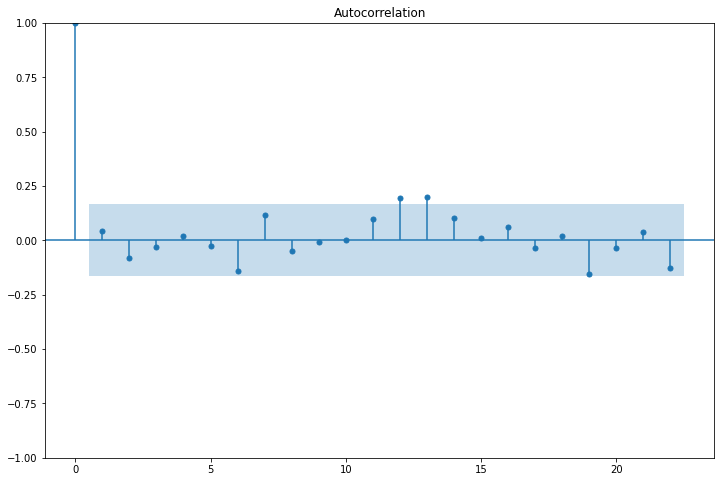

In [22]:
plt.rc("figure", figsize=(12,8))
res_lineal = (campy - campy_fit_lineal.fitted) / np.sqrt(campy_fit_lineal.fitted)
plot_acf(res_lineal, bartlett_confint=False)
plt.show()

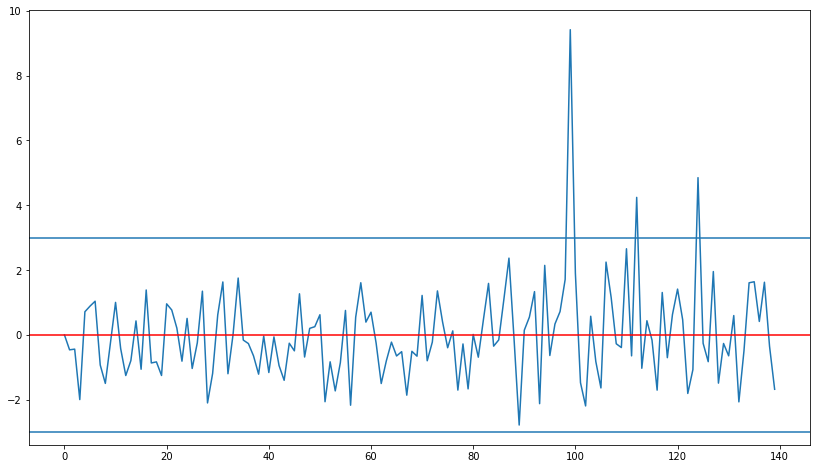

In [19]:
plt.plot(res_lineal)
plt.axhline(0, color='r')
plt.axhline(2*np.std(res_lineal))
plt.axhline(-2*np.std(res_lineal))
plt.show()

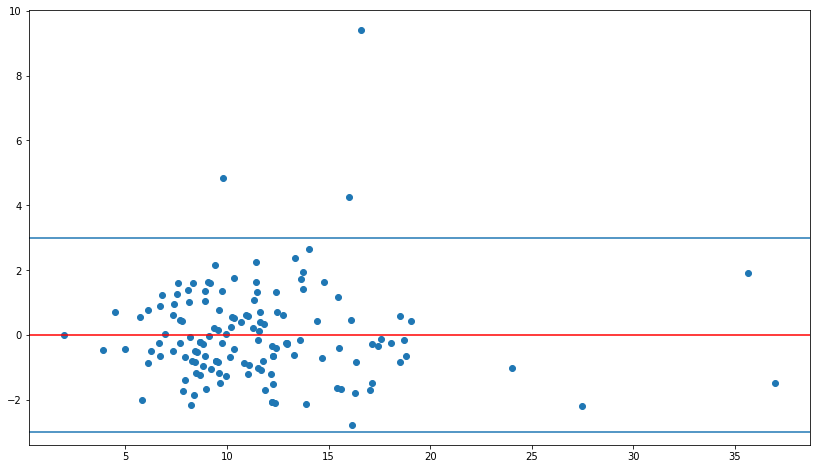

In [20]:
plt.plot(campy_fit_lineal.fitted, res_lineal, 'o')
plt.axhline(0, color='r')
plt.axhline(2*np.std(res_lineal))
plt.axhline(-2*np.std(res_lineal))
plt.show()

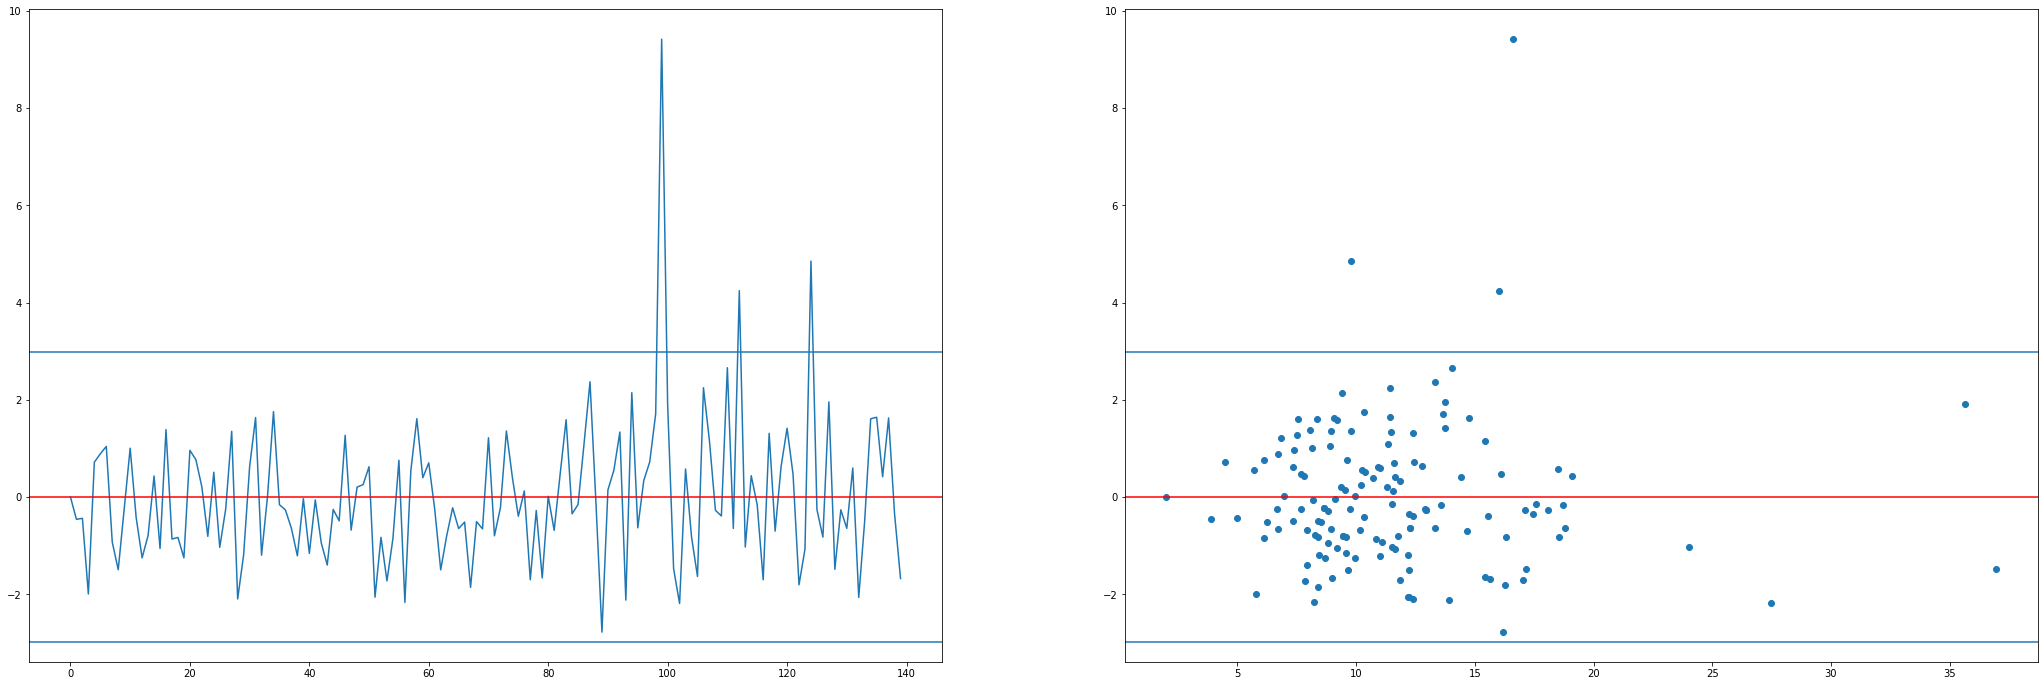

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(36,12))

ax1.plot(res_lineal)
ax1.axhline(0, color='r')
ax1.axhline(2*np.std(res_lineal))
ax1.axhline(-2*np.std(res_lineal))

ax2.plot(campy_fit_lineal.fitted, res_lineal, 'o')
ax2.axhline(0, color='r')
ax2.axhline(2*np.std(res_lineal))
ax2.axhline(-2*np.std(res_lineal))

plt.show()

### Log-lineal model

In [23]:
campy_fit_log_lineal = PoissonAutoregression(1,1,link="log-lineal")
campy_fit_log_lineal.fit(campy)
campy_fit_log_lineal.coefs

array([0.40428331, 0.24247582, 0.58584658])

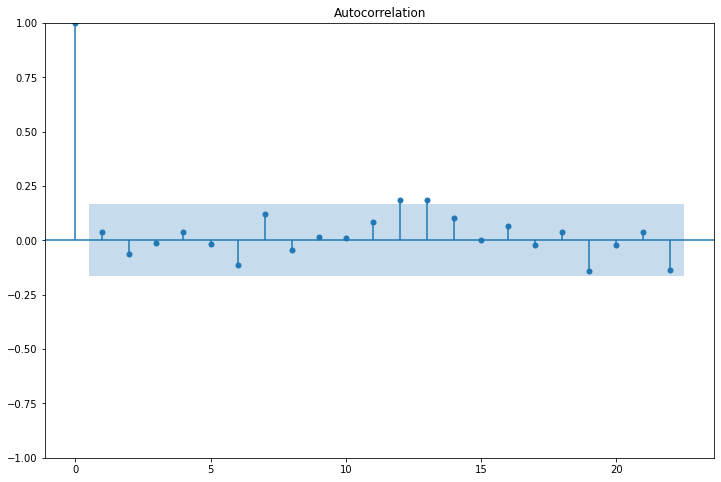

In [24]:
plt.rc("figure", figsize=(12,8))
res_log_lineal = (campy - campy_fit_log_lineal.fitted) / np.sqrt(campy_fit_log_lineal.fitted)
plot_acf(res_log_lineal, bartlett_confint=False)
plt.show()

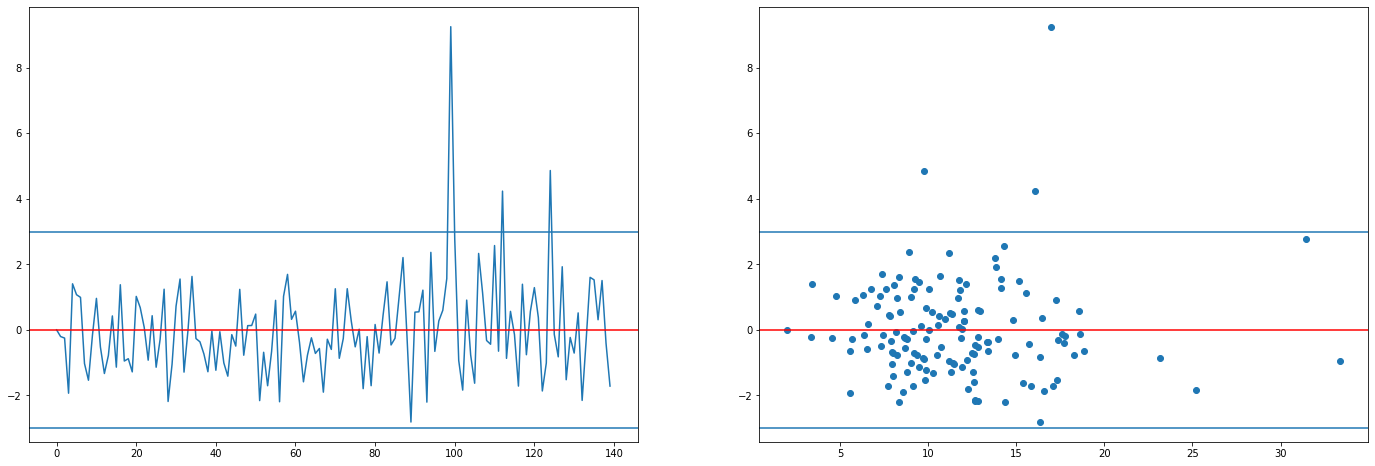

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(24,8))

ax1.plot(res_log_lineal)
ax1.axhline(0, color='r')
ax1.axhline(2*np.std(res_log_lineal))
ax1.axhline(-2*np.std(res_log_lineal))

ax2.plot(campy_fit_log_lineal.fitted, res_log_lineal, 'o')
ax2.axhline(0, color='r')
ax2.axhline(2*np.std(res_log_lineal))
ax2.axhline(-2*np.std(res_log_lineal))

plt.show()

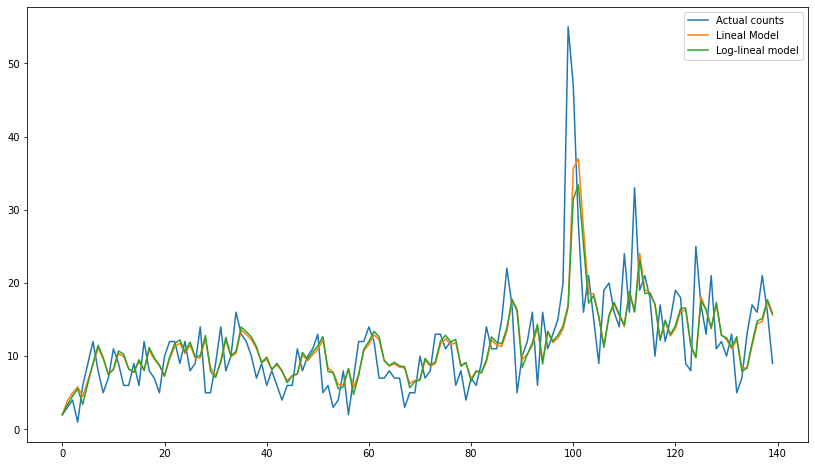

In [36]:
fig = plt.figure(figsize=(14,8))
#fig.suptitle('Actual vs fitted Campylobacter infections counts')
actual, = plt.plot(range(campy.shape[0]),campy,label='Actual counts')
lineal, = plt.plot(range(campy.shape[0]),campy_fit_lineal.fitted,label='Lineal Model')
log_lineal, = plt.plot(range(campy.shape[0]),campy_fit_log_lineal.fitted,label='Log-lineal model')
plt.legend(handles=[actual,lineal, log_lineal])
plt.show()

In [15]:
mean_squared_error(campy, campy_fit_log_lineal.fitted)

30.902944109703796

### Using the algorithm for authomatic parameter's selection

In [16]:
auto_ingarch = AutoINGARCH(series=campy, max_p=13, max_q=13, cv_folds=5, num_iter=100)
ingarch_model = auto_ingarch()

The best model uses parameters p = 8 and q = 13 with a cv_score of 59.06309193211138


In [27]:
ingarch_model = PoissonAutoregression(8,13,link="log-lineal")

In [28]:
ingarch_model.fit(campy)
ingarch_model.coefs

array([ 0.4270603 , -0.13372614,  0.04559574, -0.06811482, -0.30014302,
        0.28991783, -0.25550098, -0.29717392, -0.92519098,  0.40586369,
        0.05136468,  0.22086723,  0.13177181, -0.06658012,  0.0602742 ,
        0.28949887,  0.45477408,  0.50395737, -0.01286547,  0.14238797,
        0.11701783,  0.12178101])

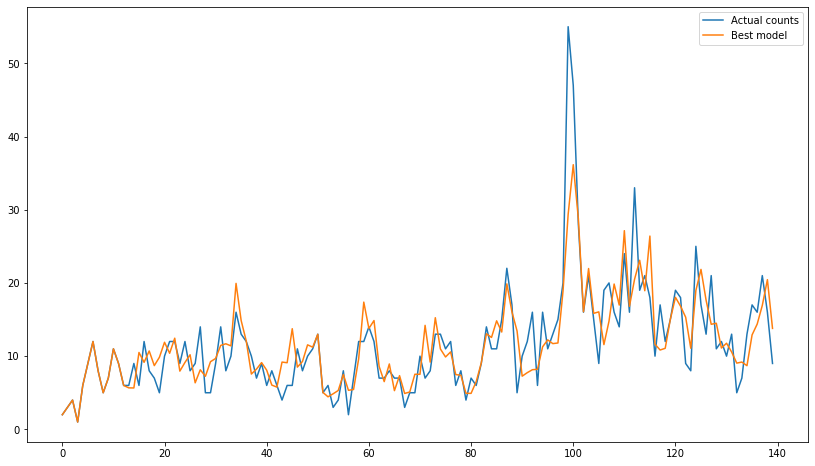

In [29]:
fig = plt.figure(figsize=(14,8))
#fig.suptitle('Actual vs fitted Campylobacter infections counts')
actual, = plt.plot(range(campy.shape[0]),campy,label='Actual counts')
ingarch, = plt.plot(range(campy.shape[0]),ingarch_model.fitted,label='Best model')
plt.legend(handles=[actual,ingarch])
plt.show()

In [30]:
ingarch_model.fitted

array([ 2.        ,  3.        ,  4.        ,  1.        ,  6.        ,
        9.        , 12.        ,  8.        ,  5.        ,  7.        ,
       11.        ,  9.        ,  6.        ,  5.66842713,  5.6543155 ,
       10.50167804,  9.15700203, 10.70946559,  8.70548626,  9.8473284 ,
       11.89483152, 10.39075965, 12.45169778,  7.95430668,  9.13780781,
       10.19138116,  6.35726997,  8.13974321,  7.24537505,  9.24243972,
        9.68236894, 11.46856382, 11.68912117, 11.40433348, 19.93768819,
       14.86588352, 12.05321803,  7.55622177,  8.2293968 ,  9.11974201,
        8.08204272,  6.04478455,  5.77281358,  9.18955784,  9.10006505,
       13.74709094,  8.50307845,  9.26801789, 11.54346883, 11.22785892,
       12.98854731,  5.04915375,  4.44427337,  4.85833965,  5.30894514,
        7.49528129,  5.33222059,  5.44276378,  9.64042687, 17.37848574,
       13.78084654, 14.86255761,  8.6036933 ,  6.51932002,  8.93119081,
        5.28738683,  7.33898047,  4.90328777,  5.10595554,  7.52

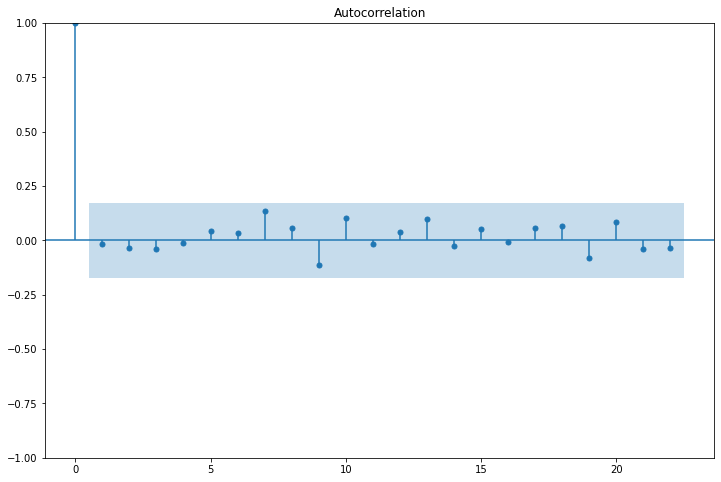

In [31]:
plt.rc("figure", figsize=(12,8))
res_bm = ((campy - ingarch_model.fitted) / np.sqrt(ingarch_model.fitted))[13:]
plot_acf(res_bm, bartlett_confint=False)
plt.show()

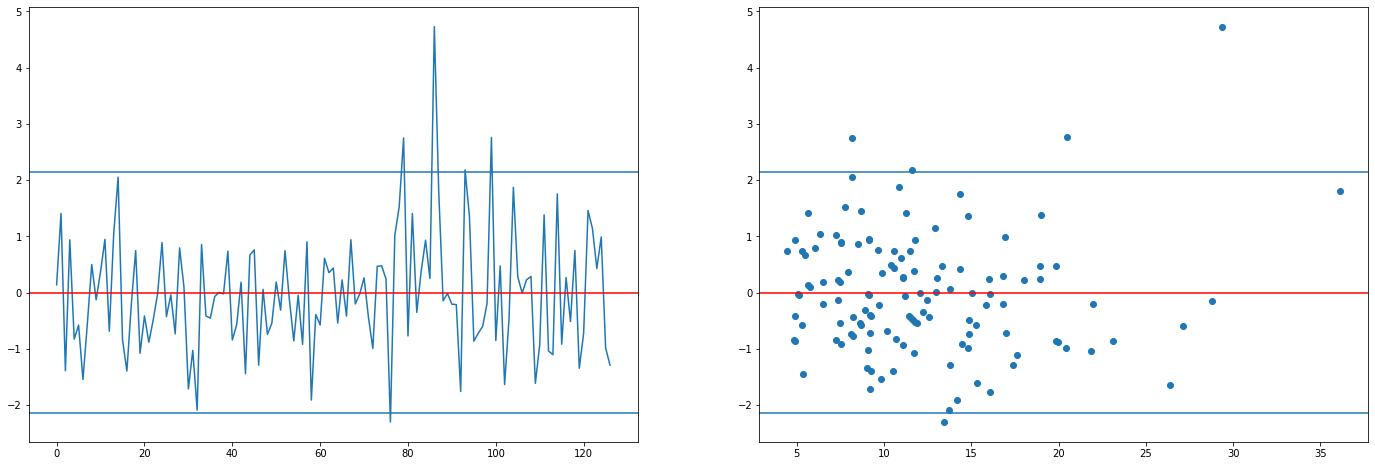

In [33]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(24,8))

ax1.plot(res_bm)
ax1.axhline(0, color='r')
ax1.axhline(2*np.std(res_bm))
ax1.axhline(-2*np.std(res_bm))

ax2.plot(ingarch_model.fitted[13:], res_bm, 'o')
ax2.axhline(0, color='r')
ax2.axhline(2*np.std(res_bm))
ax2.axhline(-2*np.std(res_bm))

plt.show()

In [18]:
mean_squared_error(campy, ingarch_model.fitted)


16.140803182371545

## Case 2: Road Casualties in Great Britain 1969-1984



In [2]:
road_casualties = pd.read_csv(os.path.join(base_path, 'Data', 'GB_drivers_killed_data.csv'))
road_casualties = road_casualties['x'].to_numpy()

In [3]:
rc_fit_lineal = PoissonAutoregression(1,1,link="lineal")
rc_fit_lineal.fit(road_casualties)
rc_fit_lineal.coefs

array([48.47324368, -0.11082659,  0.71660141])

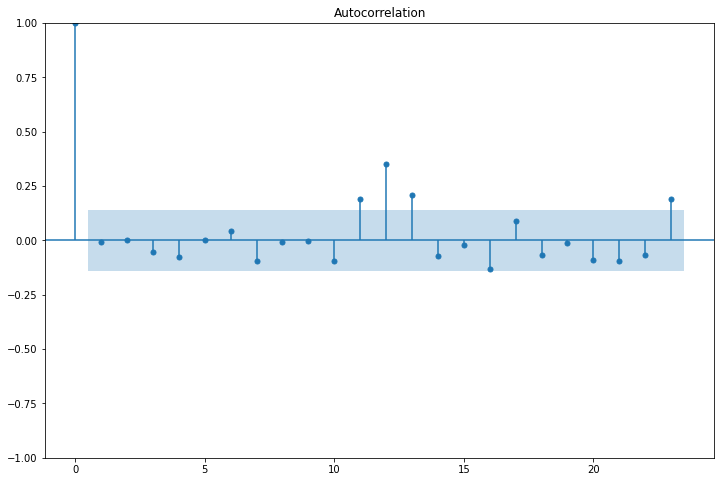

In [4]:
plt.rc("figure", figsize=(12,8))
res_rc_lineal = (road_casualties - rc_fit_lineal.fitted)/np.sqrt(rc_fit_lineal.fitted)
plot_acf(res_rc_lineal, bartlett_confint=False)
plt.show()

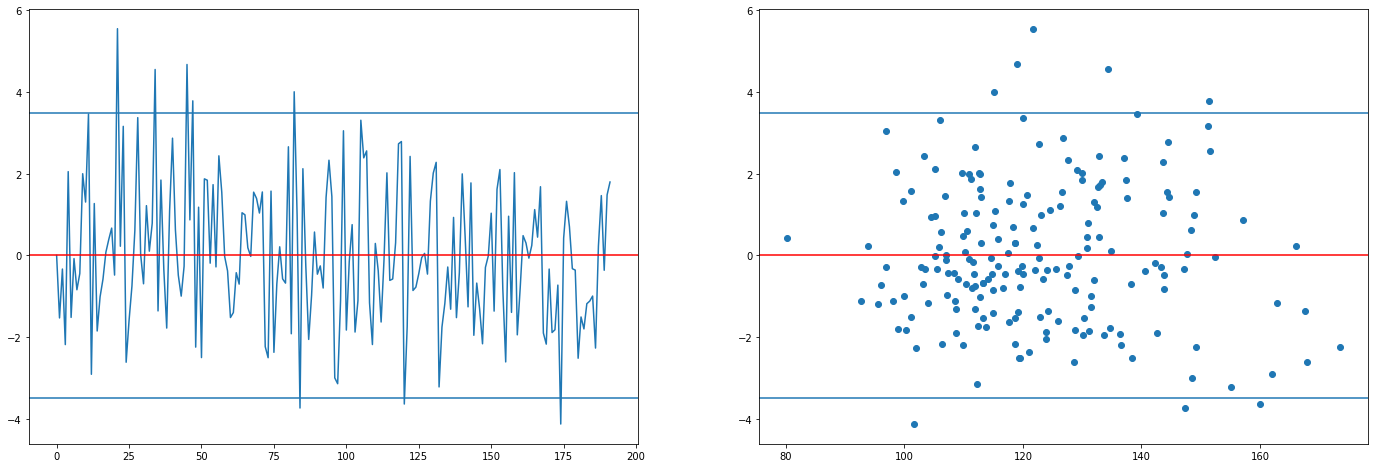

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(24,8))

ax1.plot(res_rc_lineal)
ax1.axhline(0, color='r')
ax1.axhline(2*np.std(res_rc_lineal))
ax1.axhline(-2*np.std(res_rc_lineal))

ax2.plot(rc_fit_lineal.fitted, res_rc_lineal, 'o')
ax2.axhline(0, color='r')
ax2.axhline(2*np.std(res_rc_lineal))
ax2.axhline(-2*np.std(res_rc_lineal))

plt.show()

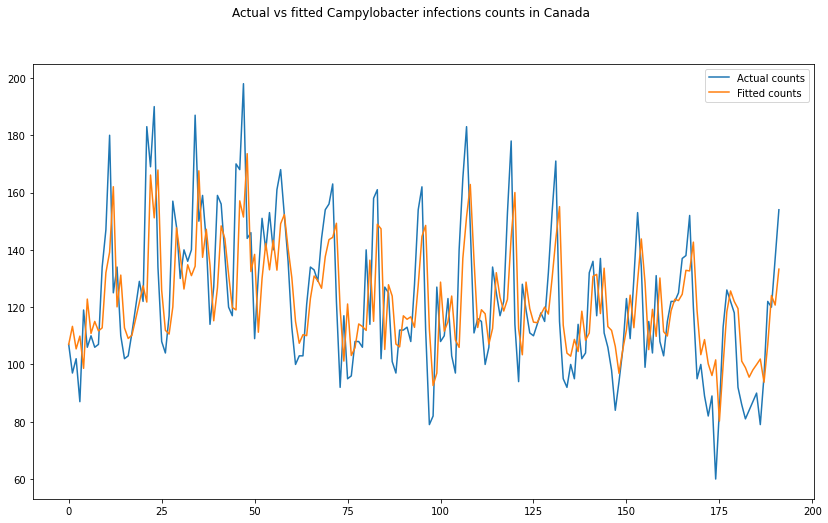

In [25]:
fig = plt.figure(figsize=(14,8))
fig.suptitle('Actual vs fitted Campylobacter infections counts')
actual, = plt.plot(range(road_casualties.shape[0]),road_casualties,label='Actual counts')
fitted, = plt.plot(range(road_casualties.shape[0]),rc_fit_lineal.fitted,label='Fitted counts')
plt.legend(handles=[actual,fitted])
plt.show()

In [6]:
mean_squared_error(road_casualties, rc_fit_lineal.fitted)

384.4242413640465

### Log-lineal model

In [7]:
rc_fit_log_lineal = PoissonAutoregression(1,1,link="log-lineal")
rc_fit_log_lineal.fit(road_casualties)
rc_fit_log_lineal.coefs

array([ 2.07999645, -0.14306378,  0.71073052])

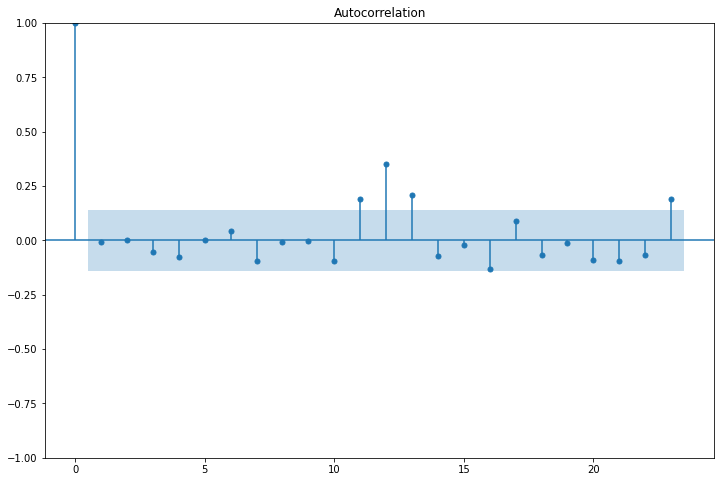

In [8]:
plt.rc("figure", figsize=(12,8))
res_rc_log_lineal = (road_casualties - rc_fit_log_lineal.fitted) /np.sqrt(rc_fit_log_lineal.fitted)
plot_acf(res_rc_lineal, bartlett_confint=False)
plt.show()

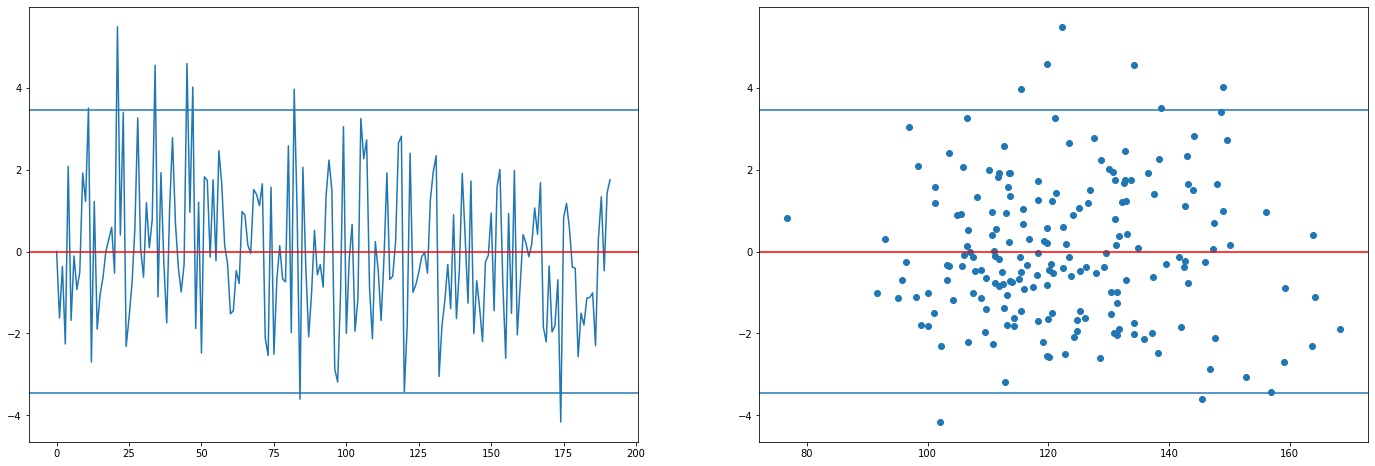

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(24,8))

ax1.plot(res_rc_log_lineal)
ax1.axhline(0, color='r')
ax1.axhline(2*np.std(res_rc_log_lineal))
ax1.axhline(-2*np.std(res_rc_log_lineal))

ax2.plot(rc_fit_log_lineal.fitted, res_rc_log_lineal, 'o')
ax2.axhline(0, color='r')
ax2.axhline(2*np.std(res_rc_log_lineal))
ax2.axhline(-2*np.std(res_rc_log_lineal))

plt.show()

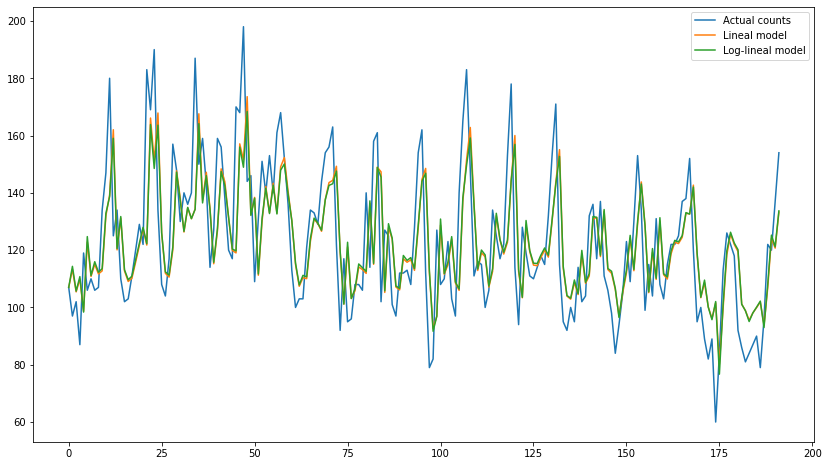

In [37]:
fig = plt.figure(figsize=(14,8))
#fig.suptitle('Road Casualties in Great Britain')
actual, = plt.plot(range(road_casualties.shape[0]),road_casualties,label='Actual counts')
lineal, = plt.plot(range(road_casualties.shape[0]),rc_fit_lineal.fitted,label='Lineal model')
log_lineal, = plt.plot(range(road_casualties.shape[0]),rc_fit_log_lineal.fitted,label='Log-lineal model')
plt.legend(handles=[actual,lineal,log_lineal])
plt.show()

In [31]:
mean_squared_error(road_casualties, rc_fit_log_lineal.fitted)

379.49348607212954

### Using the algorithm for authomatic parameter's selection

In [32]:
rc_auto_ingarch = AutoINGARCH(series=road_casualties, max_p=12, max_q=12, cv_folds=5, num_iter=100)
rc_ingarch_model = rc_auto_ingarch()

The best model uses parameters p = 1 and q = 12 with a cv_score of 553.0354601191857


In [10]:
rc_ingarch_model = PoissonAutoregression(1,12,link="log-lineal")

In [11]:
rc_ingarch_model.fit(road_casualties)
rc_ingarch_model.coefs

array([ 0.57640655, -0.18783316,  0.54603911,  0.03979755, -0.04267036,
       -0.03579677,  0.03736983,  0.05188514, -0.14886122,  0.11368915,
        0.02422057, -0.08210435,  0.20995711,  0.35277578])

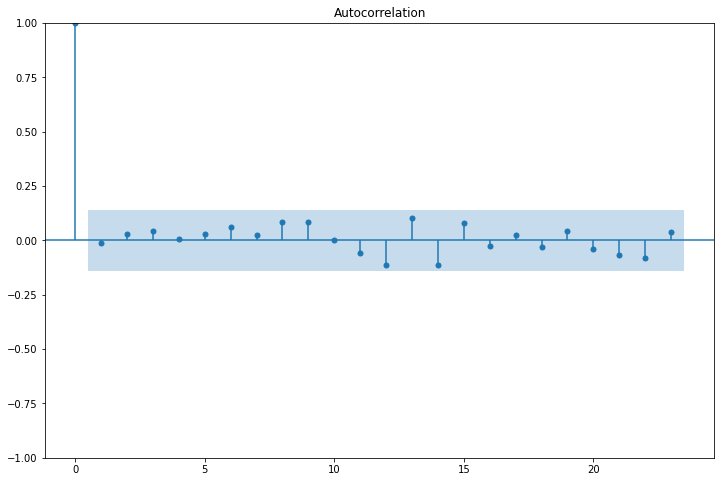

In [12]:
plt.rc("figure", figsize=(12,8))
res_rc_bm = (road_casualties - rc_ingarch_model.fitted) / np.sqrt(rc_ingarch_model.fitted)
plot_acf(res_rc_bm, bartlett_confint=False)
plt.show()

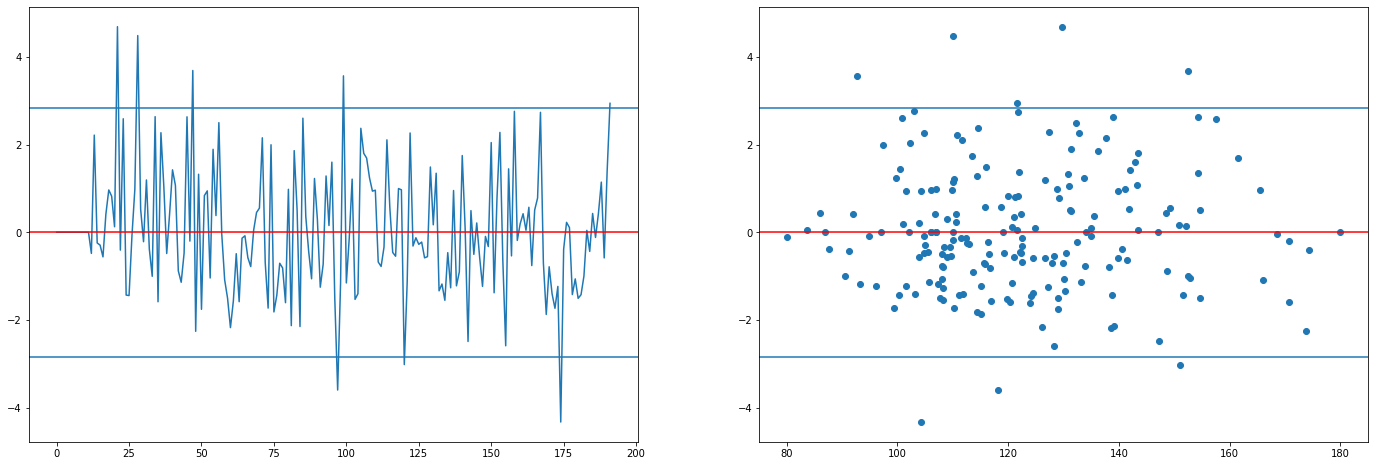

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(24,8))

ax1.plot(res_rc_bm)
ax1.axhline(0, color='r')
ax1.axhline(2*np.std(res_rc_bm))
ax1.axhline(-2*np.std(res_rc_bm))

ax2.plot(rc_ingarch_model.fitted, res_rc_bm, 'o')
ax2.axhline(0, color='r')
ax2.axhline(2*np.std(res_rc_bm))
ax2.axhline(-2*np.std(res_rc_bm))

plt.show()

In [32]:
mean_squared_error(road_casualties, rc_ingarch_model.fitted)

250.76988623507043